In [19]:
import pandas as pd 
import numpy as np 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from yellowbrick.target import FeatureCorrelation

In [7]:
df= pd.read_csv("spotify_songs.csv")
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [8]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

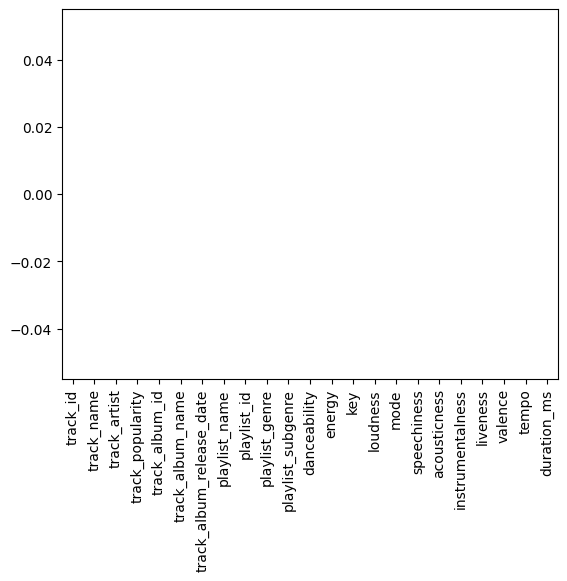

In [9]:
df.dropna(inplace = True)
df.isnull().sum().plot.bar()
plt.show()

In [10]:
df = df.sort_values(by=['track_popularity'], ascending=False)
df.drop_duplicates(subset=['track_name'], keep='first', inplace=True)
df = df.sort_values(by=['track_popularity'], ascending=False).head(1000)
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
23109,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280
21384,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,New Hip Hop‏‏​​ ‍,5WNUX6jisX0NRlVDTm6RDd,r&b,...,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653
23107,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.575,91.019,189486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,4uTvPEr01pjTbZgl7jcKBD,NASA,Ariana Grande,76,2fYhqwDWXjbpjaIJPEfKFw,"thank u, next",2019-02-08,Post Teen Pop,2Aud8PXoTGcyY5esHu4Aaz,pop,...,6,-6.891,1,0.3030,0.4510,0.000000,0.2520,0.470,75.029,182000
14020,10Nmj3JCNoMeBQ87uw5j8k,Dani California,Red Hot Chili Peppers,76,7xl50xr9NDkd3i2kBbzsNZ,Stadium Arcadium,2006-05-09,Permanent Wave,2ExyzXAbukW7I8bDqdGvPB,rock,...,0,-2.360,1,0.0437,0.0193,0.000009,0.3460,0.730,96.184,282160
12539,20OFwXhEXf12DzwXmaV7fj,Bad Moon Rising,Creedence Clearwater Revival,76,0i9mOB6mPGqwVvtJEXiwPG,Green River (40th Anniversary Edition),1969-08-03,Classic Rock Drive,37i9dQZF1DXdOEFt9ZX0dh,rock,...,2,-5.973,1,0.0321,0.0586,0.000005,0.0630,0.942,178.946,141600
2826,3P3pw6C19j31Rnzgo3JG7o,Perfect Strangers,Jonas Blue,76,2xZSrcBmvMw9Y8hac6xU7L,Blue,2018-11-09,ElectroPop 2020,4frhr6RQM2fMOm2mpvOVo6,pop,...,1,-4.100,1,0.0451,0.3900,0.000000,0.2130,0.704,117.965,196613


In [11]:
df['track_album_release_date']= pd.to_datetime(df['track_album_release_date'], errors= 'coerce')
df['year'] = pd.DatetimeIndex(df['track_album_release_date']).year
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 20091 to 19322
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  1000 non-null   object        
 1   track_name                1000 non-null   object        
 2   track_artist              1000 non-null   object        
 3   track_popularity          1000 non-null   int64         
 4   track_album_id            1000 non-null   object        
 5   track_album_name          1000 non-null   object        
 6   track_album_release_date  978 non-null    datetime64[ns]
 7   playlist_name             1000 non-null   object        
 8   playlist_id               1000 non-null   object        
 9   playlist_genre            1000 non-null   object        
 10  playlist_subgenre         1000 non-null   object        
 11  danceability              1000 non-null   float64       
 12  energy              

In [13]:
df = df.drop(columns=['track_id', 'track_album_id', 'playlist_name', 'playlist_id'])
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,latin,latin hip hop,0.824,0.588,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438,2019.0
23104,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,r&b,hip pop,0.621,0.601,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636,2019.0
23109,Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,r&b,hip pop,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280,2019.0
21384,The Box,Roddy Ricch,98,Please Excuse Me For Being Antisocial,2019-12-06,r&b,urban contemporary,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653,2019.0
23107,Memories,Maroon 5,98,Memories,2019-09-20,r&b,hip pop,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.575,91.019,189486,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,NASA,Ariana Grande,76,"thank u, next",2019-02-08,pop,post-teen pop,0.747,0.458,6,-6.891,1,0.3030,0.4510,0.000000,0.2520,0.470,75.029,182000,2019.0
14020,Dani California,Red Hot Chili Peppers,76,Stadium Arcadium,2006-05-09,rock,permanent wave,0.556,0.913,0,-2.360,1,0.0437,0.0193,0.000009,0.3460,0.730,96.184,282160,2006.0
12539,Bad Moon Rising,Creedence Clearwater Revival,76,Green River (40th Anniversary Edition),1969-08-03,rock,classic rock,0.508,0.774,2,-5.973,1,0.0321,0.0586,0.000005,0.0630,0.942,178.946,141600,1969.0
2826,Perfect Strangers,Jonas Blue,76,Blue,2018-11-09,pop,electropop,0.730,0.861,1,-4.100,1,0.0451,0.3900,0.000000,0.2130,0.704,117.965,196613,2018.0


In [17]:
floats = []
for col in df.columns:
    if df[col].dtype == 'float':
        floats.append(col)

len(floats)

10

C:\Users\Aditya\AppData\Local\Temp\ipykernel_16812\2891737098.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\Aditya\AppData\Local\Temp\ipykernel_16812\2891737098.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\Aditya\AppData\Local\Temp\ipykernel_16812\2

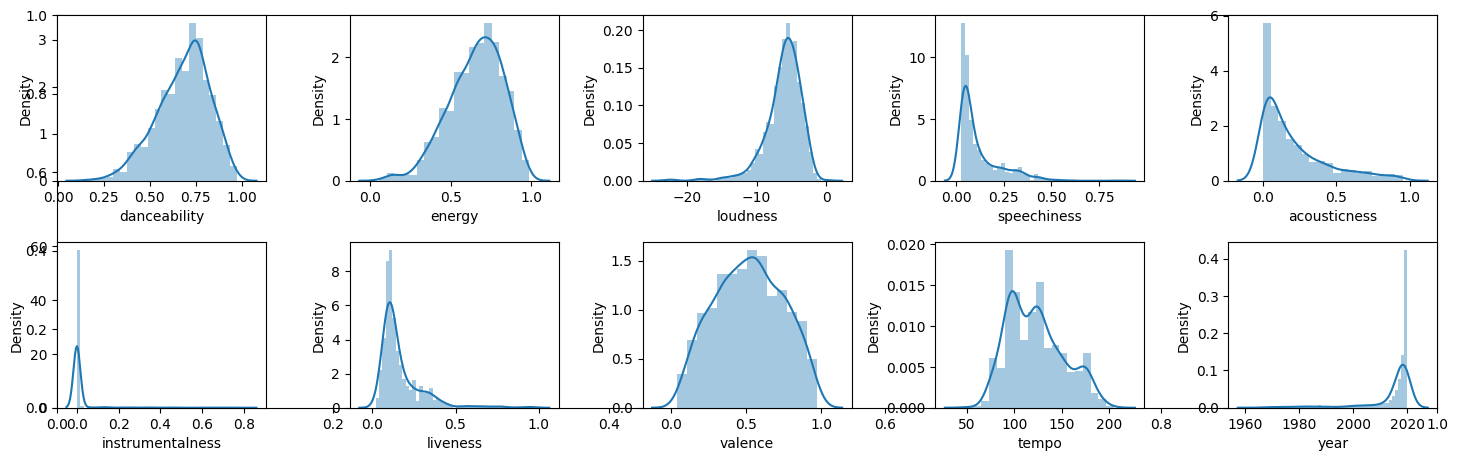

In [18]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
    plt.subplot(2, 5, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [29]:
df['track_name'] = df['track_name'].fillna('')

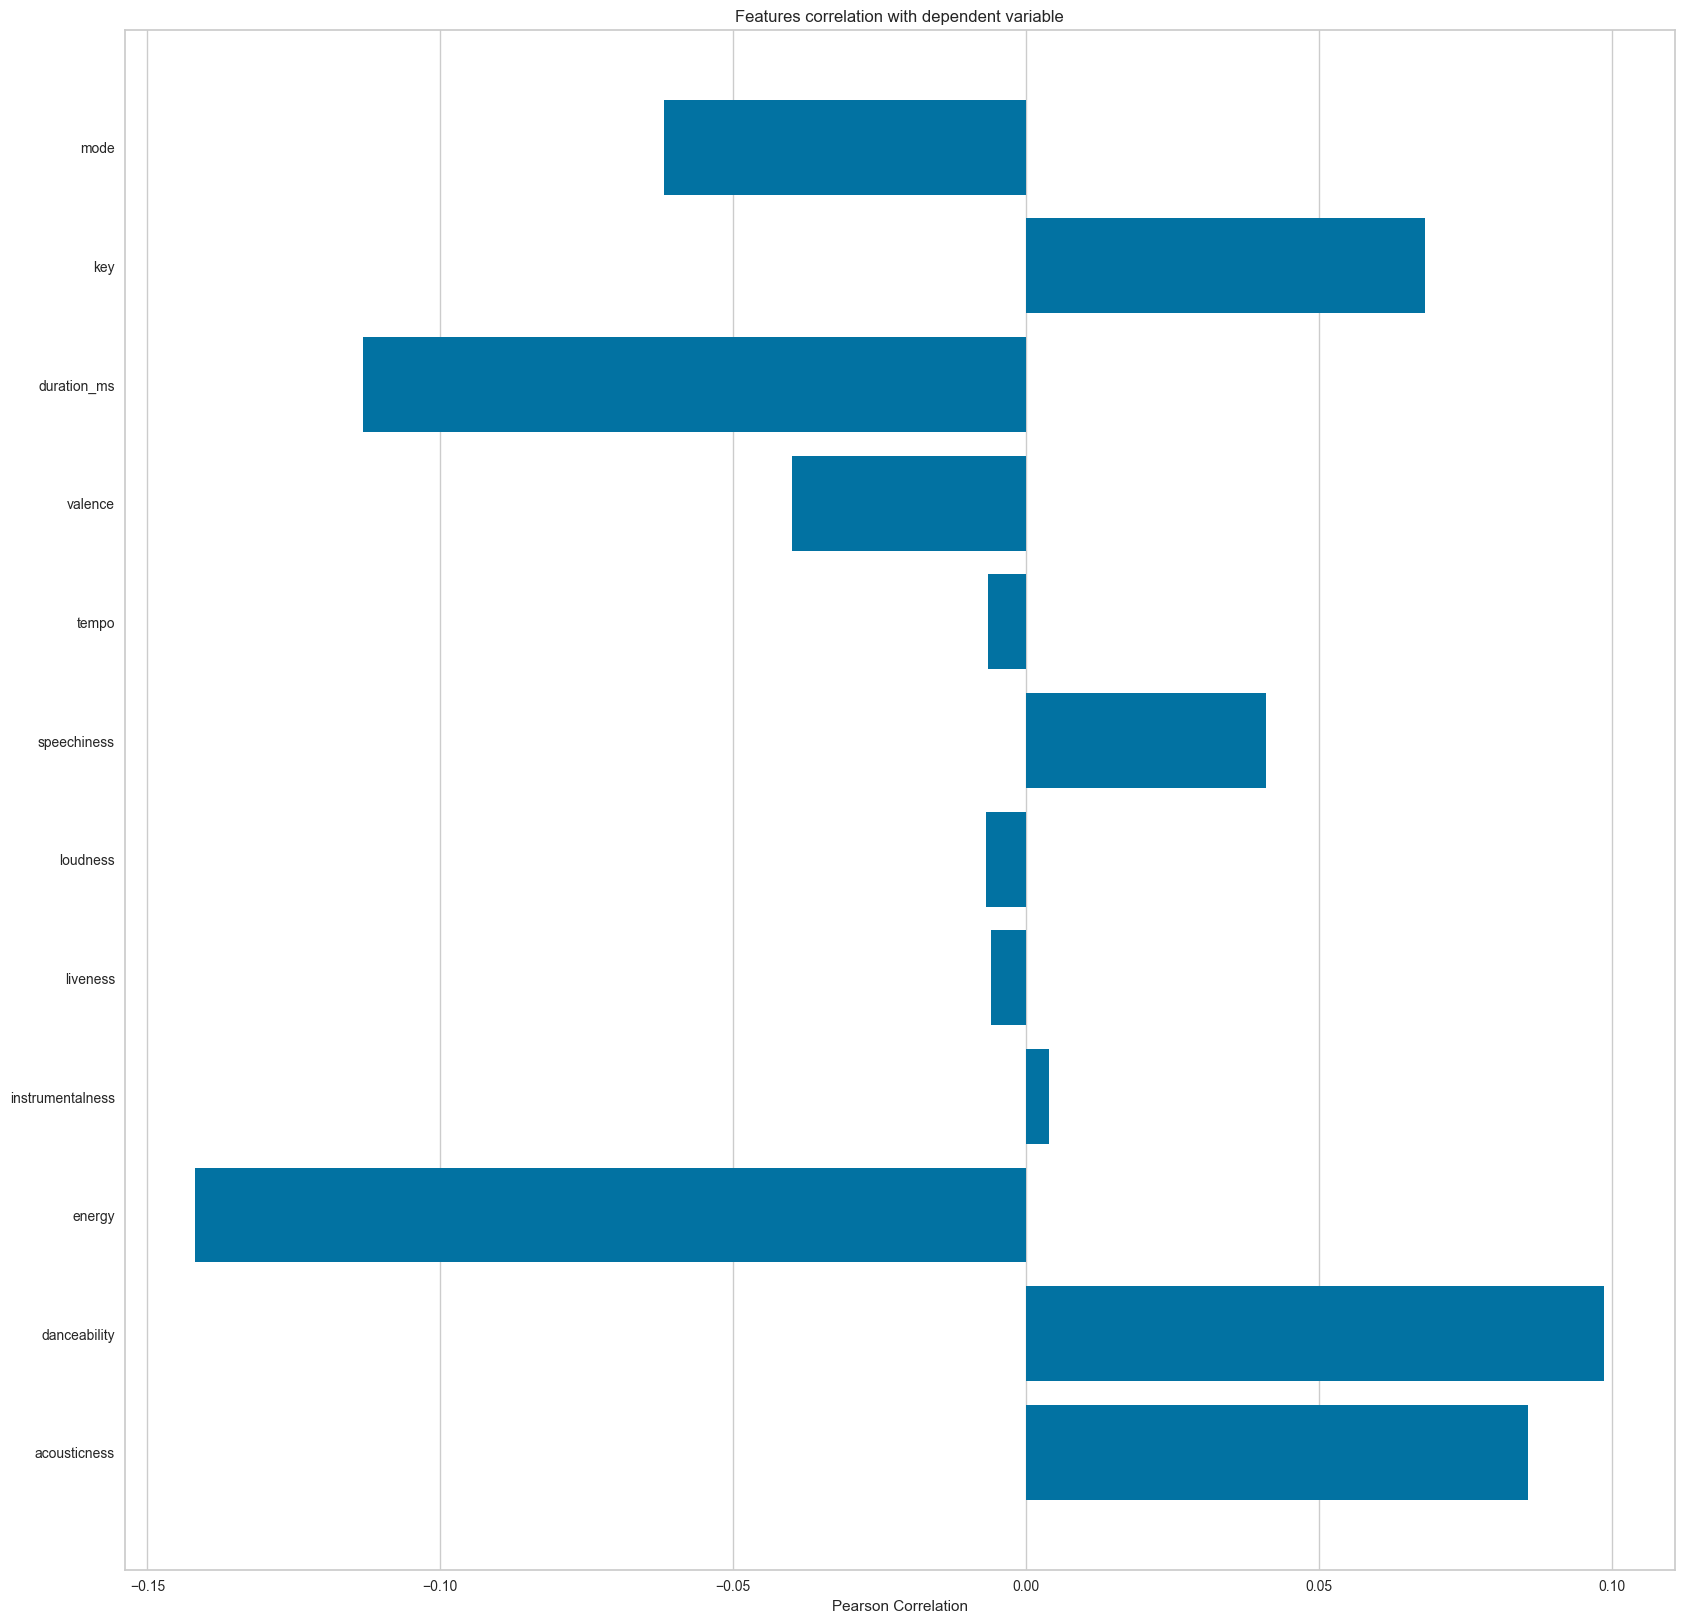

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [30]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode']

X, y = df[feature_names], df['track_popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

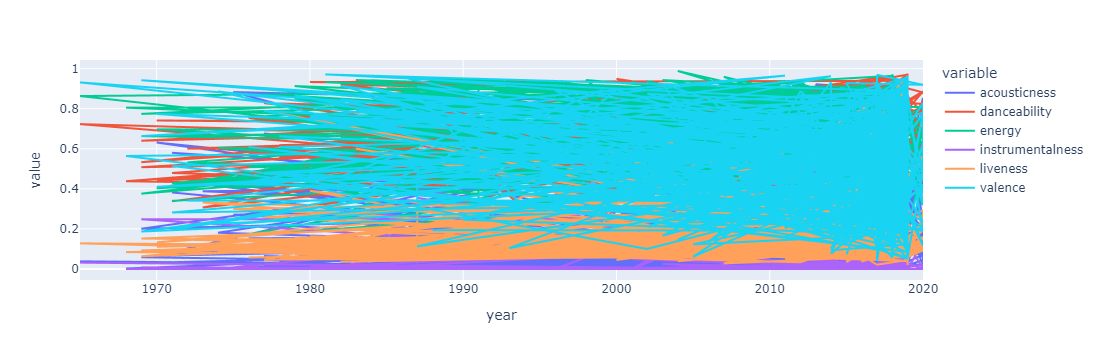

In [42]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(df, x='year', y=sound_features)
fig.show()

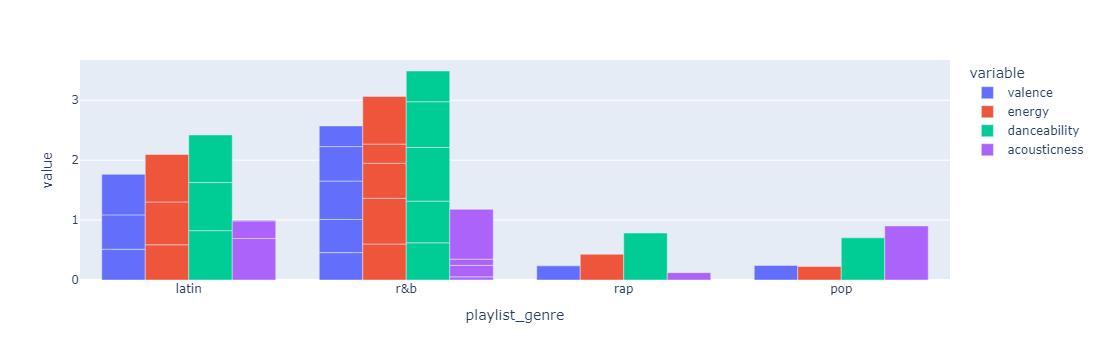

In [46]:
top10_genres = df.nlargest(10, 'track_popularity')

fig = px.bar(top10_genres, x='playlist_genre', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

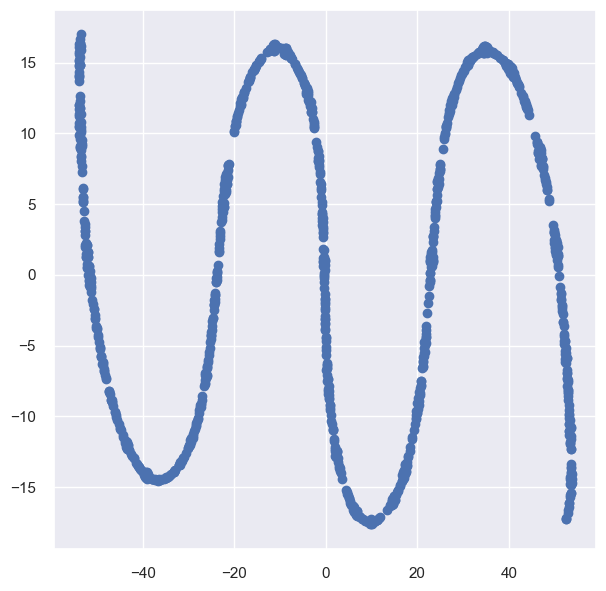

In [55]:
# Select only numerical columns for t-SNE
numerical_df = df.select_dtypes(include=[np.number])

# Now apply t-SNE on the numerical data
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(numerical_df.head(1000))

# Plotting the result
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()


C:\Users\Aditya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



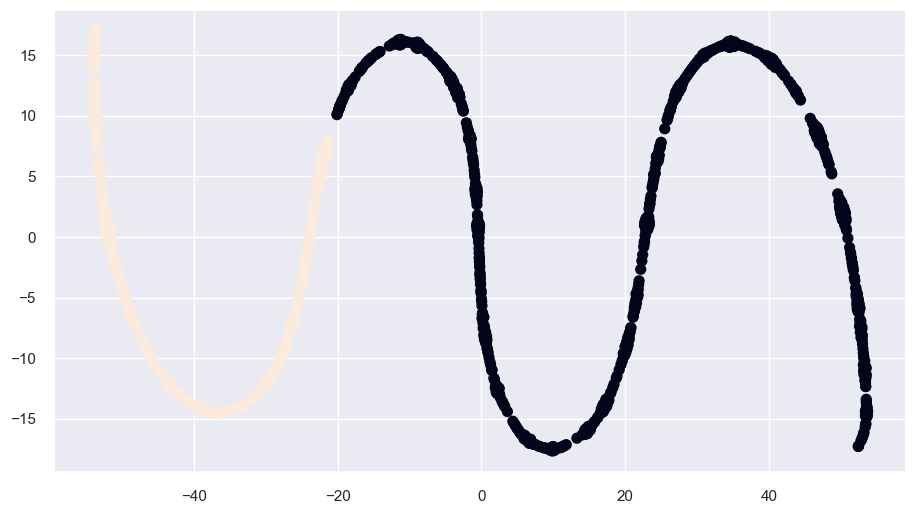

In [56]:
 #Import Spectral Clustering from scikit-learn
 from sklearn.cluster import SpectralClustering
numerical_df = df.select_dtypes(include=[np.number])
 #Define the Spectral Clustering Model
 model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
 #Fit and predict the labels
 y_m_sc = model.fit_predict(numerical_df)
 #Plot the colored clusters as identified by Spectral Clustering
 plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_m_sc, s=50)

In [57]:
def get_similarities(df, song_name):
    # Instantiate CountVectorizer
    count_vectorizer = CountVectorizer()
    
    # Getting vector for the input song.
    text_array1 = count_vectorizer.fit_transform(df['track_name'] + " " + df['playlist_genre']).toarray()
    num_array1 = df[df["track_name"]==song_name].select_dtypes(include=np.number).to_numpy()

    # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in df.iterrows():
        name = row["track_name"]
        
        # Getting vector for current song.
        text_array2 = count_vectorizer.transform([name + " " + row['playlist_genre']]).toarray()
        num_array2 = df[df['track_name']==name].select_dtypes(include=np.number).to_numpy()

        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)
        
    return sim

In [58]:
def recommend_songs(song_name, df):
    # Base case
    if df[df['track_name'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you have entered an invalid name.\nSome songs you may like:\n')
        for song in df.sample(n=5)['track_name'].values:
            print(song)
        return

    df['similarity_factor'] = get_similarities(df, song_name)

    df.sort_values(by=['similarity_factor', 'track_popularity'],
                   ascending=[False, False],
                   inplace=True)

    # First song will be the input song itself as the similarity will be highest.
    # Replace 'display' with 'print' if not using Jupyter notebooks.
    print(df[['track_name', 'track_artist']][2:7])

In [59]:
recommend_songs ('Creep', df)

      track_name   track_artist
21251    Perfect     Ed Sheeran
19014     Solita           Sech
20261     Piropo         Noriel
19201    Secreto       Anuel AA
18488   Criminal  Natti Natasha
